In [1]:
#% matplotlib inline

from datetime import datetime 
import h5py
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
cmap = cm.get_cmap('Blues')
import random
from numpy.linalg import lstsq
from scipy import stats

import matplotlib as mpl
mpl.rcParams["image.interpolation"] = 'none'

In [2]:
# For plotting, from Luke

def compute_bounds(mu, sig, n_sigma = 3):
    """
    Use mean and standard deviation vectors to compute upper and lower bounds.
    """
    upper = mu + n_sigma * np.sqrt(np.abs(sig))
    lower = mu - n_sigma * np.sqrt(np.abs(sig))
    
    return upper, lower

In [3]:


#read hdf5 file for this notebook
f1 = h5py.File("Data/FigS09.hdf5", "r")

#get the data for plotting the sd image
dataCh0 = np.array(f1['panel_fg']['dataCh0'])
roimask = np.array(f1['panel_fg']['roimask'])
x_zoom = np.array(f1['panel_fg']['x_zoom'])

f1.close()

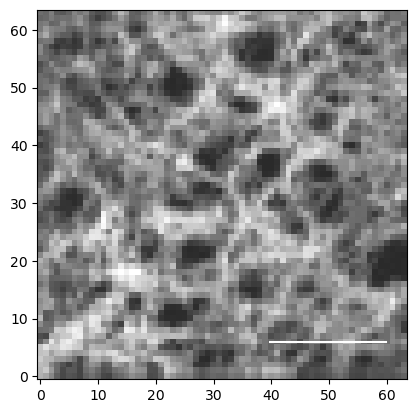

In [4]:
#calculate std
std = np.std(dataCh0, axis=2)  # standard deviation across time
avg_projection = np.mean(dataCh0, axis=2)

plt.imshow(std, cmap='Greys_r', origin='lower', vmin=0, vmax=20)
# plt.imshow(avg_projection, cmap='Greys_r', origin='lower', )

start = 30
plt.axhline(y=6, xmin=start/47.666, xmax=(start+15)/47.666, color='white')


# Figpath = 'Fig_temp/'
# savename = Figpath+"X_field_std_15microns.pdf"
# plt.savefig(savename, transparent=True, bbox_inches='tight')

# Map of d-prime for this field

longshort

In [5]:
#pull this data from the hdf5 file
dsi_results = pd.read_hdf('Data/FigS09.hdf5', 'dsi_results')

In [6]:
# std_100 = dsi_results['dsi_100'].std()
std_150 = dsi_results['dsi_150'].std()
std_300 = dsi_results['dsi_300'].std()

mean_dsi = dsi_results['d_prime'].mean()

# std_dsi = np.array([std_100, std_150, std_300])
std_dsi = np.array([std_150, std_300])

std_top = mean_dsi + std_dsi
std_bottom = mean_dsi - std_dsi

In [7]:
dsi_results['dsi_150'].max(), dsi_results['dsi_300'].max() #dsi_results['dsi_100'].max(), 

(85.33118961802316, 55.6159483501448)

In [8]:
dsi_results['dsi_150'].min(), dsi_results['dsi_300'].min() #dsi_results['dsi_100'].min(), 

(-24.746822369847155, -48.7108626911663)

In [9]:
cmp = plt.get_cmap('BrBG') #sns.diverging_palette(20, 220, n=50)
cmp.set_bad(color='lightgrey')
color_range = 50

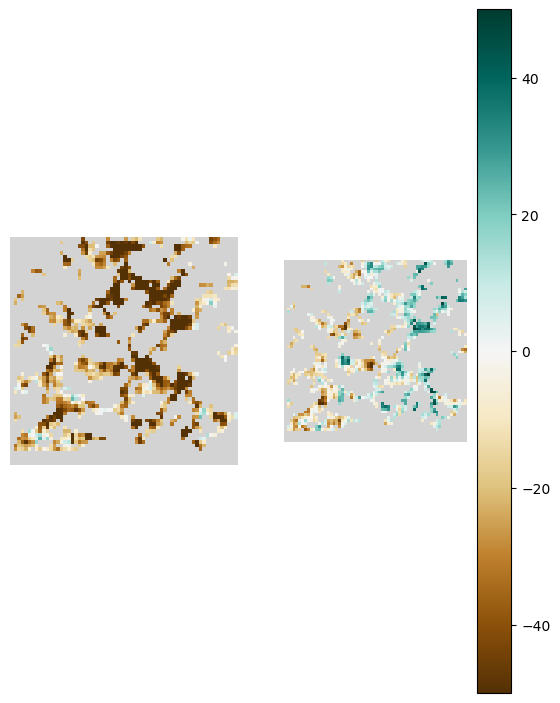

In [10]:
# plot map of d-prime
roi_list = dsi_results.index.to_frame(index=False)['pixel_id'].unique()

            
#make map for 150 length stimulus
dsmap1 = roimask*(-1)
xlength = dsmap1.shape[0]
ylength = dsmap1.shape[1]
for x in range(xlength):
    for y in range(ylength):  
        if dsmap1[x,y] in roi_list:
            roi_index = np.int(dsmap1[x, y])
            dsmap1[x,y] = dsi_results.loc[roi_index, 'dsi_150']
        else:
            dsmap1[x,y] = np.nan


            
#make map for 300 length stimulus            
dsmap2 = roimask*(-1)
xlength = dsmap2.shape[0]
ylength = dsmap2.shape[1]
for x in range(xlength):
    for y in range(ylength):  
        if dsmap2[x,y] in roi_list:
            roi_index = np.int(dsmap2[x, y])
            dsmap2[x,y] = dsi_results.loc[roi_index, 'dsi_300']
        else:
            dsmap2[x,y] = np.nan

            
            
fig = plt.figure(figsize=(10, 10))


ax1 = fig.add_subplot(1,3,2)
plt.imshow(dsmap1*-1, cmap=cmp, vmin=-1*color_range, vmax=color_range, origin='lower') #'RdYlBu'
# cb = plt.colorbar()
# ax1.set_ylim([10, 48])
# ax1.set_xlim([18, 45])
plt.axis('off')

ax2 = fig.add_subplot(1,3,3)
plt.imshow(dsmap2*-1, cmap=cmp, vmin=-1*color_range, vmax=color_range, origin='lower') #'RdYlBu'
cb = plt.colorbar()
# ax2.set_ylim([10, 48])
# ax2.set_xlim([18, 45])
plt.axis('off')
# ax2.axhline(y=25)
# ax2.axhline(y=13)
# ax2.axhline(y=37)
#cb.remove()
plt.draw()

# Figpath = 'Fig_temp/'
# savename = Figpath+"X_dsi_maps_examplefield_colorbar.pdf"
# plt.savefig(savename, transparent=True, bbox_inches='tight')

plt.show()

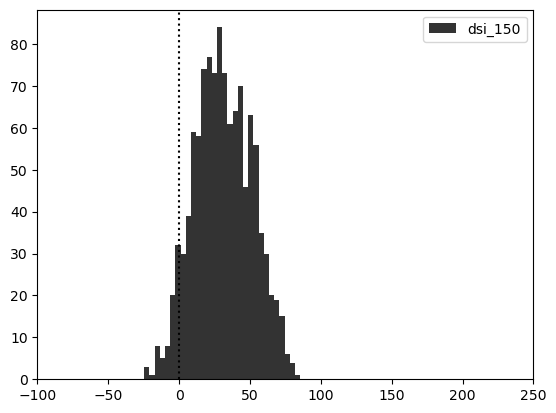

In [11]:
n_bins = 30
plt.hist(dsi_results['dsi_150'], n_bins, label='dsi_150', color='black', alpha=0.8) # density=True, histtype='step', cumulative=True, 
# plt.hist(dsi_results['dsi_300'], n_bins, histtype='step', cumulative=True, label='dsi_300', color='grey') # density=True, 

axes=plt.gca()
axes.axvline(linestyle='dotted', color='k')
axes.set_xlim([-100, 250])
plt.legend()

# Figpath = 'Fig_temp/'
# savename = Figpath+"X_dprime_cum_histogram_allfields.pdf"
# plt.savefig(savename, transparent=True, bbox_inches='tight')

plt.show()

C:\Users\alv5645\Anaconda3\envs\bcmotion\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\alv5645\Anaconda3\envs\bcmotion\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\alv5645\Anaconda3\envs\bcmotion\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will ra

(-50.0, 100.0)

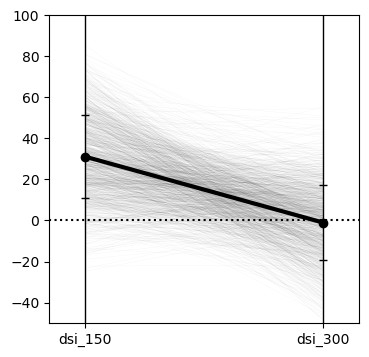

In [12]:
from pandas.plotting import parallel_coordinates

toplot = dsi_results.reset_index()

plt.figure(figsize = (4,4))

axes = plt.gca()
# axes.set_ylim([-0.3,0.3])
# axes.set_xlim([-4,4])

ax = plt.subplot(1,1,1)
parallel_coordinates(toplot, 'pixel_id', cols=['dsi_150', 'dsi_300'], color = 'black', linewidth=0.1, alpha=0.1)#colormap='Greys',linestyle='dotted', marker = '.',

plt.plot(dsi_results.mean(), color='k', linewidth=3, marker='o')
plt.plot(dsi_results.mean()+dsi_results.std(),  color='k', linestyle='', marker='_')
plt.plot(dsi_results.mean()-dsi_results.std(),  color='k', linestyle='', marker='_')


ax.legend().remove()
ax.grid(False)
ax.axhline(color='k', linestyle='dotted')
axes.set_xlim([-0.15,1.15])
axes.set_ylim([-50,100])

# Figpath = 'Fig_temp/'
# savename = Figpath+"X_dsi_pixels_examplefield.pdf"
# plt.savefig(savename, transparent=True, bbox_inches='tight')

In [13]:
dsi_results.mean(), dsi_results.std()

C:\Users\alv5645\Anaconda3\envs\bcmotion\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


(dsi_150    31.112824
 dsi_300    -1.058966
 dtype: float64,
 dsi_150    20.145079
 dsi_300    18.164108
 dtype: float64)

In [14]:

just_dprimes = dsi_results[['dsi_150','dsi_300']].reset_index()

stats_df = just_dprimes.melt(id_vars="pixel_id")

In [15]:
import pingouin as pg
#150 vs 300
pg.wilcoxon(just_dprimes['dsi_150'], just_dprimes['dsi_300'])

C:\Users\alv5645\Anaconda3\envs\bcmotion\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


,W-val,tail,p-val,RBC,CLES
Wilcoxon,32165.0,two-sided,6.459889e-152,0.900038,0.880976


longshortshorter

# Model results for single ROIs

In [16]:
#pull this data from the hdf5 file
results = pd.read_hdf('Data/FigS09.hdf5', 'gp_results_df')


In [17]:
center_px_id = 400 #for long short field from october:  224, 257, 400, 551, 740, 938, 1108
#for february longshortshorter field good examples: 400, 800, 948 #not good: 600, 500
color_id =7
results_roi = results.loc[results['center_pixel_id']==center_px_id]

#pull out the relevant data
mu = results_roi['mu'].values[0]
x_predict = results_roi['x_predict'].values[0]
sig = results_roi['sig'].values[0]
sig_outer = results_roi['sig_outer'].values[0]
x_predict_t = np.copy(x_predict[::mu.shape[0],:])

In [18]:

#pull this data from the hdf5 file
data_df = pd.read_hdf('Data/FigS09.hdf5', 'snippet_data_df')

In [19]:
rois = results['roi_list'].values[0]

#get the average response of these rois (averaged over binned time of the traces) that was used for GP modeling
df_GP_rois = data_df.loc[rois].groupby(
    ['directions', 'lengths', 'trial_nums', 'time_resampled']).mean()

df_GP_rois = df_GP_rois.reset_index()
df_GP_rois = df_GP_rois.set_index(['directions', 'lengths', 'time_bin'])

df_GP_rois_average = df_GP_rois.groupby(['directions', 'lengths', 'time_bin']).mean()

mean_of_trace = df_GP_rois['y'].mean()
sd_of_trace = df_GP_rois['y'].std()

In [20]:
d_prime = [dsi_results.loc[center_px_id]['dsi_150'], dsi_results.loc[center_px_id]['dsi_300']]


<Figure size 1500x600 with 0 Axes>

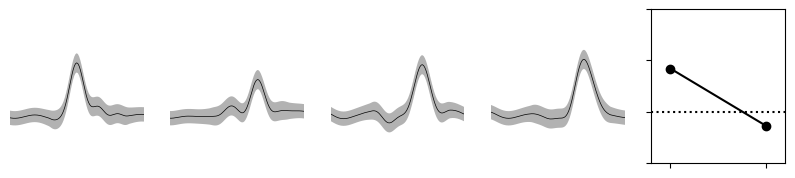

In [21]:
#plot GP and d-prime for this pixel
plt.figure(figsize=(15, 6))

directions = [0, 180]
lengths = [150, 300]

colors1 = ['peru', 'lightseagreen', 'peru', 'lightseagreen', 'peru', 'lightseagreen']
colors2 = ['blue', 'black', 'green', 'magenta', 'purple', 'orange']
colors3 = cm.get_cmap('Dark2')

n_conditions = mu.shape[0]
# gp_index = [0, 2, 1, 3, 5, 4]
# gp_index = [3, 0, 5, 2, 4, 1]
gp_index = [1, 3, 0, 2]

plt.figure(figsize=(10, 2))
# plt.title(str(d_prime))
color = color_id/(9)
index = 1
for length in lengths:
    for direction in directions:

        ax1 = plt.subplot(1,5,index)
        upper, lower = compute_bounds(mu[gp_index[index-1],:]/sd_of_trace, sig[gp_index[index-1],:]/sd_of_trace, n_sigma = 3, )
        plt.fill_between(x_predict_t[:,0], upper, lower, facecolor = 'k', alpha = 0.3, ) #colors3(color)
        plt.plot(x_predict_t[:,0], mu[gp_index[index-1],:]/sd_of_trace, color='k', label=str(direction)+', '+str(length), lw=0.5)
        
#         plt.axvline(1.05, color='grey', linestyle='dotted')
#         if index == 1:    
#             plt.axvline(1)
#             plt.axvline(1.5)
        
        plt.axis('off')
        axes = plt.gca()
        axes.set_xlim([0.5, 2.])
        axes.set_ylim([-2, 4])
#         plt.legend(loc='upper left')
        
        
        

        index+=1

ax1 = plt.subplot(1,5,5)    
# lengths = ['100', '150', '300']
lengths = ['150', '300']

plt.plot(lengths, d_prime, color='k', marker='o') #colors3(color)

axes = plt.gca()
axes.set_ylim([-50,100])
axes.set_xlim([-0.2,1.2])
axes.axhline(linestyle='dotted', color='k')
# Turn off tick labels
axes.set_yticklabels([])
axes.set_xticklabels([])


# Figpath = 'Fig_temp/'
# savename = Figpath+"X_field2_1_gp_example_"+str(center_px_id)+".pdf"
# plt.savefig(savename, transparent=True, bbox_inches='tight')
        
plt.show()

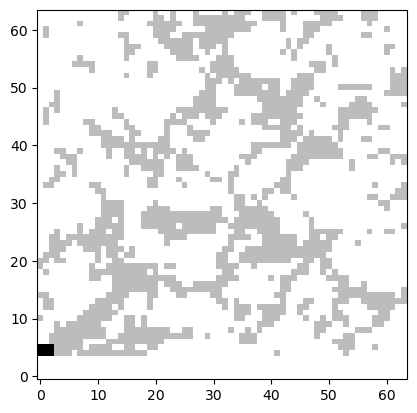

In [22]:
#show where these pixels are
dsmap0 = roimask*(-1)
xlength = dsmap0.shape[0]
ylength = dsmap0.shape[1]
for x in range(xlength):
    for y in range(ylength):  
        if dsmap0[x,y] in rois:
            dsmap0[x,y] = 2
        elif dsmap0[x,y]>0:
            dsmap0[x,y] = -0.5
        else:
            dsmap0[x,y] = np.nan

plt.imshow(dsmap0, cmap='Greys', origin='lower', vmin=-2, vmax=2)

# Figpath = 'Fig_temp/'
# savename = Figpath+"X_field2_1_example"+str(center_px_id)+"_roimap.pdf"
# plt.savefig(savename, transparent=True, bbox_inches='tight')

In [23]:
#show where these pixels are

center_pixels = [224, 257, 400, 551, 740, 938, 1108]
roi_list_all = []
for px in center_pixels:
    window = results[results['center_pixel_id'] == px]
    px_in_roi = window['roi_list'].values[0]
#     window = 'center_pixel_id = {}'.format(str(px))  #examples in the box: 208, 316, 631, 916 #outside the box: 1304, 2009, 1536
#     px_in_roi = (GaussianProcessBct() & field1 & window).fetch1('roi_list')
    roi_list_all.append(px_in_roi)

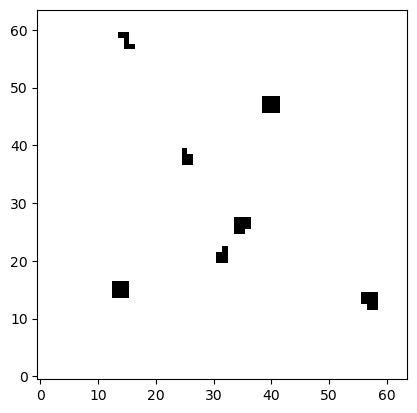

In [24]:
dsmap0 = roimask*(-1)*1000
xlength = dsmap0.shape[0]
ylength = dsmap0.shape[1]

for i, rois in enumerate(roi_list_all):

    for x in range(xlength):
        for y in range(ylength):  
            if dsmap0[x,y]/1000 in rois:
                dsmap0[x,y] = i+1
#             elif dsmap0[x,y]<0:
#                 dsmap0[x,y] = -1
#             else:
#                 dsmap0[x,y] = np.nan

dsmap0_final = np.where(dsmap0>999, np.nan, dsmap0)
dsmap0_final = np.where(dsmap0_final<0, np.nan, dsmap0_final)
#     fig=plt.figure()
plt.imshow(dsmap0_final, cmap='Greys_r', origin='lower', vmin=8, vmax=9) #1 to 9, cmap "Dark2"

# Figpath = 'Fig_temp/'
# savename = Figpath+"X_field2_1_roimap_all_black.pdf"
# plt.savefig(savename, transparent=True, bbox_inches='tight')

# Distribution from two mice at small roi resolution

In [25]:
#read hdf5 file for this notebook
f1 = h5py.File("Data/FigS09.hdf5", "r")

#get the data for plotting the sd image
dsi_together = np.array(f1['dsi_together'])


f1.close()

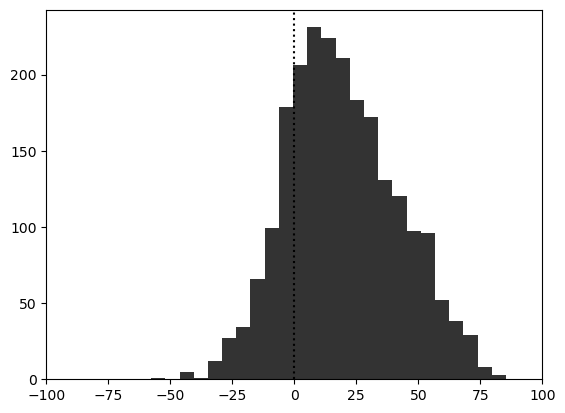

In [26]:
#histogram
n_bins = 25
plt.hist(dsi_together, n_bins, color='black', alpha=0.8) # density=True, histtype='step', cumulative=True, 
# plt.hist(dsi_results['dsi_300'], n_bins, histtype='step', cumulative=True, label='dsi_300', color='grey') # density=True, 

axes=plt.gca()
axes.axvline(linestyle='dotted', color='k')
axes.set_xlim([-100, 100])
# plt.legend()

# Figpath = 'Fig_temp/'
# savename = Figpath+"X_dprime_histogram_twofields.pdf"
# plt.savefig(savename, transparent=True, bbox_inches='tight')

plt.show()

In [27]:
dsi_together.mean(), dsi_together.std()

(19.38875443781174, 22.464591253349166)

In [28]:
#stats

stati, p_value = stats.ttest_1samp(dsi_together, 0)

stati, p_value

(40.70228404811441, 3.6456344416359024e-271)